# 6.13 - K-means
## unsupervised learning, latent vector찾기 hidden value찾기
## k개의 centroid를 찾아야 함 - local minimum에 빠질 수 있어서  
## 모든점이 각 centroid와 거리를 잰다. 
## 초기 centroid는 일단 랜덤으로 준다. - 하지만 이것이 성능에 영향을 준다. kmeans ++ 같은경우는 데이터 분포의 중점으로 구분
## k hyper parameter는 내가 정해야 한다. 
## 반복할 때마다 centroid를 다시 설정해야 한다.
## 군집내 점사이의 거리(squared error)가 줄어듬이 없어질때까지

# K-Means
### rnk, muk(random, ) => parameter, K => Hyperparameter
### data = point = instance => random(N)

In [30]:
from random import randrange

K = 3
N = 100

centroid = list()
for i in range(K):
    centroid.append([randrange(1, 100), randrange(1, 100)])

data = list()
for i in range(N):
    data.append([randrange(1,100), randrange(1,100)])

In [31]:
len(centroid), centroid[0]

(3, [53, 51])

In [32]:
len(data), data[0]

(100, [78, 69])

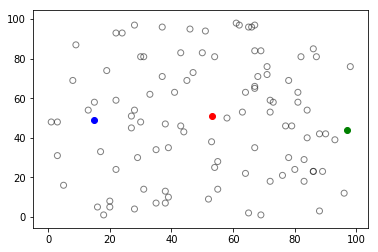

In [33]:
import matplotlib.pyplot as plt

colorMap = ['r', 'g', 'b', 'k']

for _ in data:
    plt.scatter(_[0], _[1], color=colorMap[-1], facecolor="none", alpha=.5,
               edgecolor = colorMap[-1])

for i, _ in enumerate(centroid):
#     plt.scatter(_[0], _[1], color=colorMap[-1])
#     print(i, _)
    plt.scatter(_[0], _[1], color=colorMap[i])

plt.show()

In [34]:
from math import sqrt

def distance(x1, x2):
    _sum = 0
    for i in range(len(x1)):
        _sum += (x1[i] - x2[i])**2
    return sqrt(_sum)
#     return sqrt((x1[0]-x2[0])**2 + (x1[1]-x2[1])**2)

def angle(x1, x2):
    _innerProduct = 0
    for i in range(len(x1)):
        _innerProduct += x1[i] * x2[i]
    x1VecLength = distance(x1, [0 for _ in range(len(x1))])
    x2VecLength = distance(x2, [0 for _ in range(len(x2))])
    return _innerProduct/(x1VecLength * x2VecLength)
#     return (x1[0] * x2[0] + x1[1] * x2[1]) / (distance(x1, (0,0)) * distance(x2, (0,0)))
    

In [35]:
distance((1,1), (1,1)), angle((1,1), (1,1))

(0.0, 0.9999999999999998)

# EM algorithm
### E-Expectation = rnk assignment
### M-Maximization = centroid update
### cosine similraty - 타원형으로 만들어진다 그룹이

In [36]:
def expectation(x, c, opt=False):
    candidates = list()
    nearest = distance if not opt else angle
    best = min if not opt else max 
    
    for _ in c:
        candidates.append(nearest(x, _))
    return candidates.index(best(candidates)) # 클러스터 번호

In [37]:
print(expectation(data[0], centroid))

0


In [38]:
def maximization(X):
    _sum = [0 for _ in range(len(X[0]))]
    D = len(X)
    for x in X:
        for i in range(len(x)):
            _sum[i] += x[i]
    return [_/D for _ in _sum]
    #  클러스터 내 데이터의 합 / 클러스터 내 데이터 갯수
#     return (sum([x[0] for x in X])/len(X),
#             sum([x[1] for x in X])/len(X))

In [39]:
def sumSquaredError(X, c, opt=False):
    
    nearest = distance if not opt else angle
    
    error = 0
    for x in X:
        error += nearest(x, c)
    return error 

# 군집화 되는과정(euclidean)

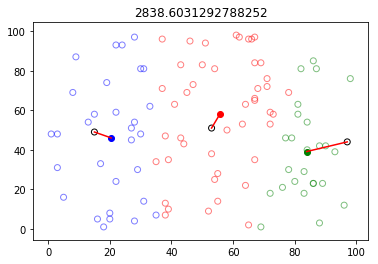

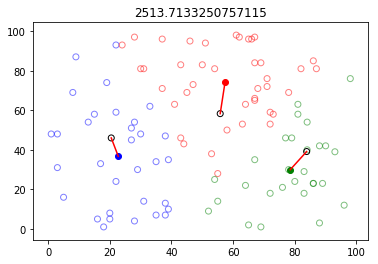

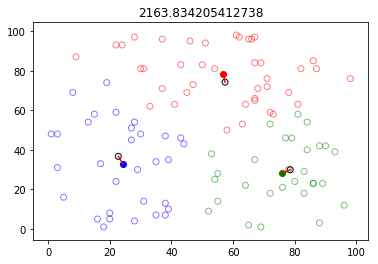

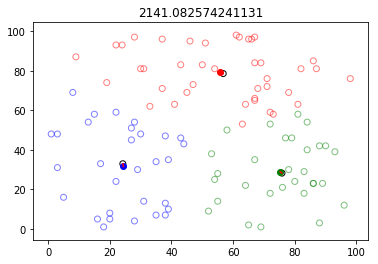

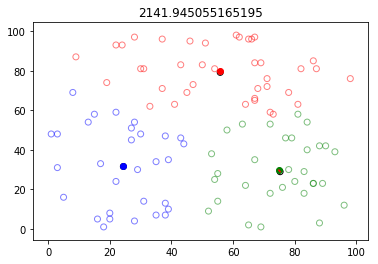

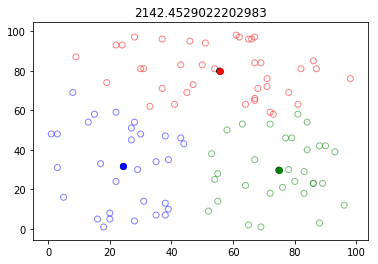

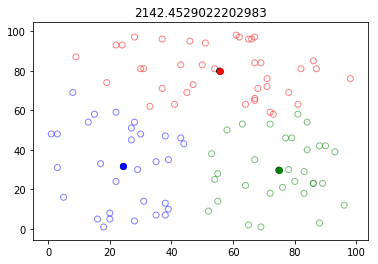

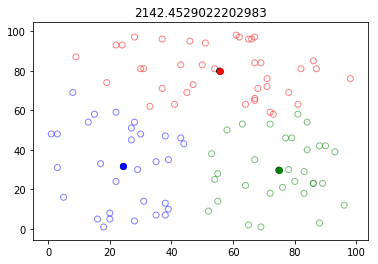

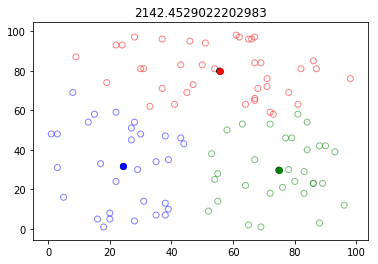

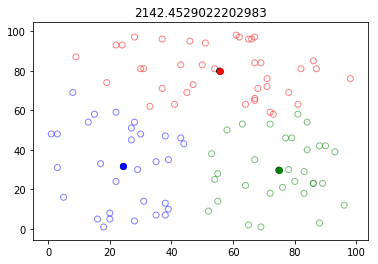

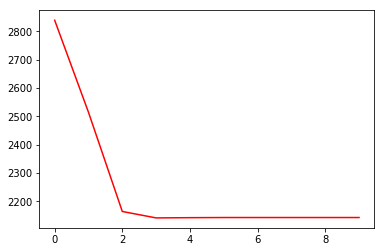

In [40]:
errorRate = list()

for _ in range(10):
    rnk = list(list(0 for _ in range(K)) for _ in range(N))
    
    for i in range(N):
        j = expectation(data[i], centroid)
        rnk[i][j] = 1

    _sse = 0
    oldCentroid = list()
    
    for k in range(K):
        X = [data[i] for i in range(N) if rnk[i][k]]
        _sse += sumSquaredError(X, centroid[k])
        oldCentroid.append(centroid[k])
        centroid[k] = maximization(X)
        
    errorRate.append(_sse)

    for i in range(N):
        plt.scatter(data[i][0], data[i][1], facecolor='none', alpha=.5, 
                    edgecolor=colorMap[rnk[i].index(max(rnk[i]))])

    for i, _ in enumerate(centroid):
        plt.plot((oldCentroid[i][0], _[0]), (oldCentroid[i][1], _[1]), 'r-')
        plt.scatter(oldCentroid[i][0], oldCentroid[i][1], edgecolors='k', facecolor='none', color=colorMap[i])
        plt.scatter(_[0], _[1], color=colorMap[i])
        
    plt.title(_sse)
    plt.show()

plt.plot(range(10),errorRate, 'r-')
plt.show()

# centroid 개수 바꿔서 군집화하기(코사인)

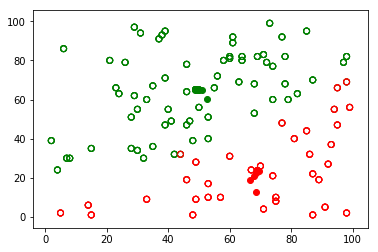

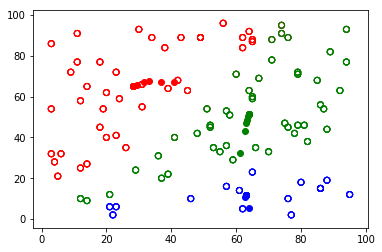

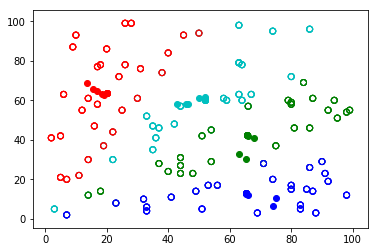

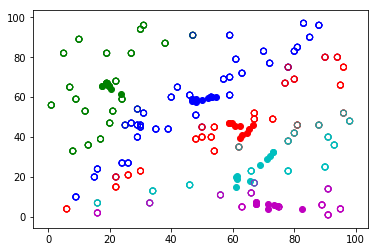

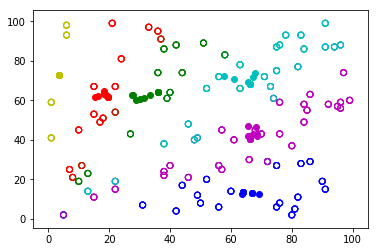

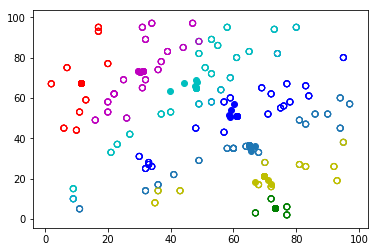

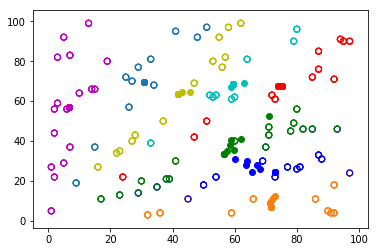

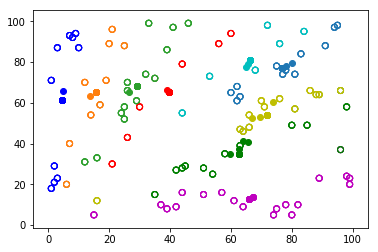

In [41]:
colorMap = ["r", "g", "b", "c", "m", "y", "C0", "C1", "C2","K"]
errorRate = list()

for K in range(2, 10):

    # centroid 랜덤 설정
    centroid = list()
    for i in range(K):
        centroid.append([randrange(1, 100), randrange(1, 100)])
    
    data = list()
    for i in range(N):
        data.append([randrange(1,100), randrange(1,100)])

    for _ in range(10):
        rnk = list(list(0 for _ in range(K)) for _ in range(N))

        for i in range(N):
            j = expectation(data[i], centroid, opt=True)
            rnk[i][j] = 1

        _sse = 0
        oldCentroid = list()

        for k in range(K):
            X = [data[i] for i in range(N) if rnk[i][k]]
            _sse += sumSquaredError(X, centroid[k], opt=True)
    #         print(centroid[k]) # 이전 centroid 값
            centroid[k] = maximization(X)
    #         print(centroid[k]) # 이후 centroid 
        errorRate.append(_sse)

        for i in range(N):
            plt.scatter(data[i][0], data[i][1], edgecolor=colorMap[rnk[i].index(max(rnk[i]))],
                        facecolor="none", alpha = .5)

        for i, _ in enumerate(centroid):
#             plt.plot((oldCentroid[i][0], _[0]),
#                      (oldCentroid[i][1], _[1]), "r-")
#             plt.scatter(oldCentroid[i][0], oldCentroid[i][1],
#                         edgecolors="k", facecolor="none",
#                         color=colorMap[i])
            plt.scatter(_[0], _[1], color=colorMap[i])
#     plt.title(_sse)
    plt.show()
plt.show()

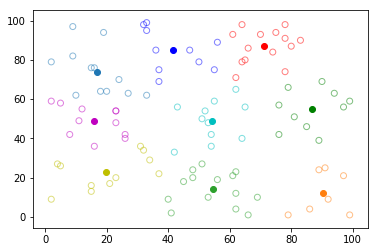

In [14]:
for i in range(N):
    plt.scatter(data[i][0], data[i][1], edgecolor=colorMap[rnk[i].index(max(rnk[i]))], facecolor="none", alpha = .5)

for i, _ in enumerate(centroid):
    plt.scatter(_[0], _[1], color=colorMap[i])

plt.show()